<a href="https://colab.research.google.com/github/cagBRT/Machine-Learning/blob/master/HierarchicalClustering4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/cemutku/k-means-and-hierarchical-clustering-implementation

In [4]:
!git clone -l -s https://github.com/cagBRT/Machine-Learning.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 720 (delta 5), reused 0 (delta 0), pack-reused 708
Receiving objects: 100% (720/720), 26.65 MiB | 7.84 MiB/s, done.
Resolving deltas: 100% (446/446), done.
/content/cloned-repo
 Admission_Predict.csv		       LogisticRegression_1.ipynb
 bank.csv			       Logistic_Regression_3.ipynb
 bank-full.csv			       Logistic_Regression_4.ipynb
 blue_line.jpg			       LogReg_Titanic.ipynb
 boston_housing.csv		       Mall_Customers.csv
 breast_cancer_data.csv		       NaiveBayesBernoulli.ipynb
 cardata.data			       NaiveBayesGaussian2.ipynb
 cows_and_wolves.txt		       NaiveBayesGaussian.ipynb
 diabetesML.ipynb		       NaiveBayesMultinomialNB2.ipynb
 dogOrMuffin.ipynb		       NaiveBayesMultinomialNB.ipynb
 fashion-mnist-sprite.png	       naiveBayes.png
 height_weight.csv		       pima_indians_diabetes.csv
 Hierarchical_Cluste

Import the necessary libraries

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import AgglomerativeClustering

Get the data and prepare it

In [0]:
# Read and upload data
data = pd.read_csv("breast_cancer_data.csv")

In [185]:
# We don't need id and NaN data.
data.drop(["Unnamed: 32", "id"], axis = 1, inplace = True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Plot the data,<br>
> malignant = reg<br>
benign = blue<br>

In [0]:
xaxis = "radius_mean"
yaxis = "texture_mean"

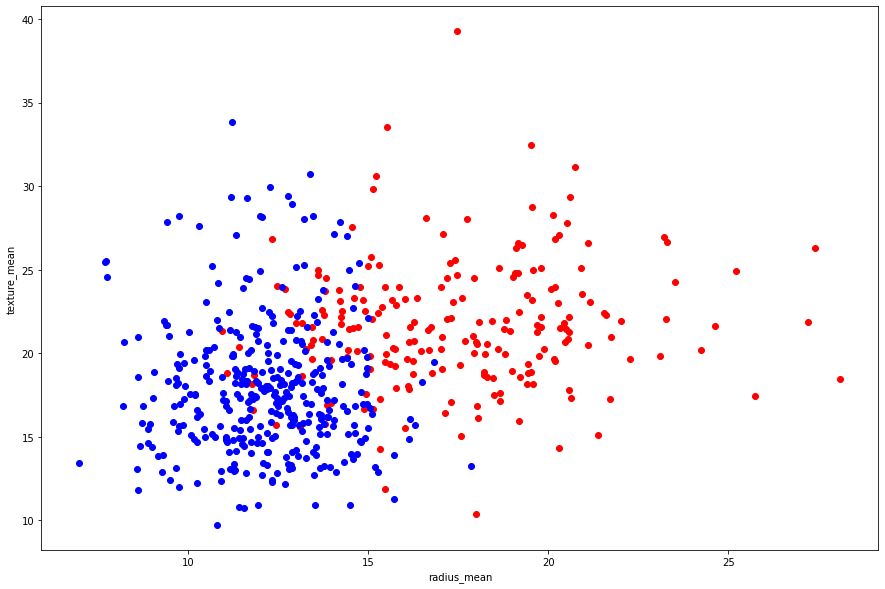

In [322]:
plt.figure(figsize = (15, 10))
plt.scatter(data[xaxis][data["diagnosis"] == "M"], data[yaxis][data["diagnosis"]== "M"], color = "red")
plt.scatter(data[xaxis][data["diagnosis"]  == "B"], data[yaxis][data["diagnosis"]== "B"], color = "blue")

plt.xlabel(xaxis)
plt.ylabel(yaxis)

plt.show()

Question: What do you think of the data? 

In [280]:
data["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Drop the label, the model will determine the label

In [281]:
# For clustering we do not need labels. Because we'll identify the labels.
diag = data["diagnosis"]
dataWithoutLabels = data.drop(["diagnosis"], axis = 1)
dataWithoutLabels.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Plot the area_se vs texture_mean

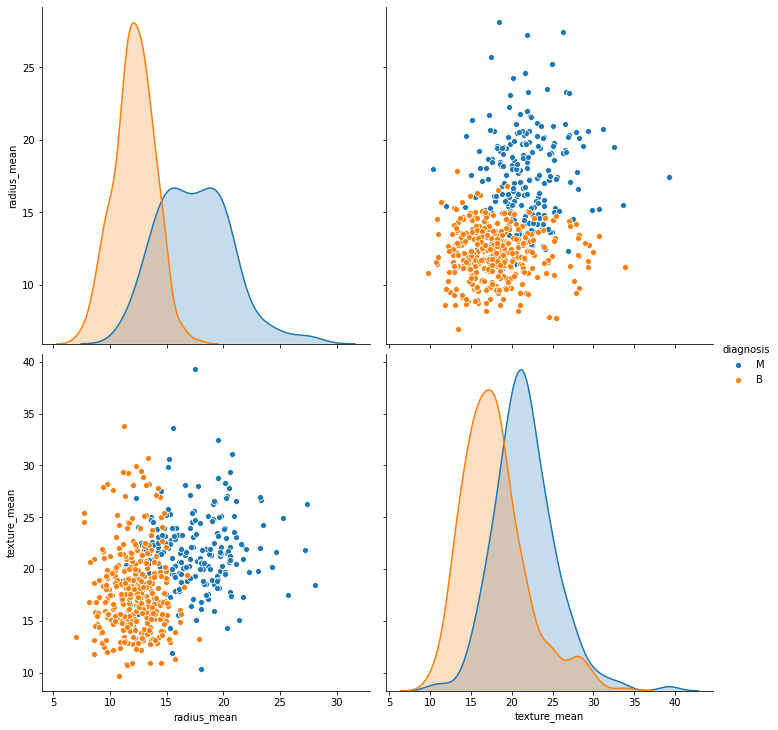

In [323]:
# area_se and texture_mean features will be used for clustering.
sns.pairplot(data.loc[:,[xaxis,yaxis, 'diagnosis']], hue = "diagnosis", height = 5)
plt.show()

Use the hierarchical model to classify the data

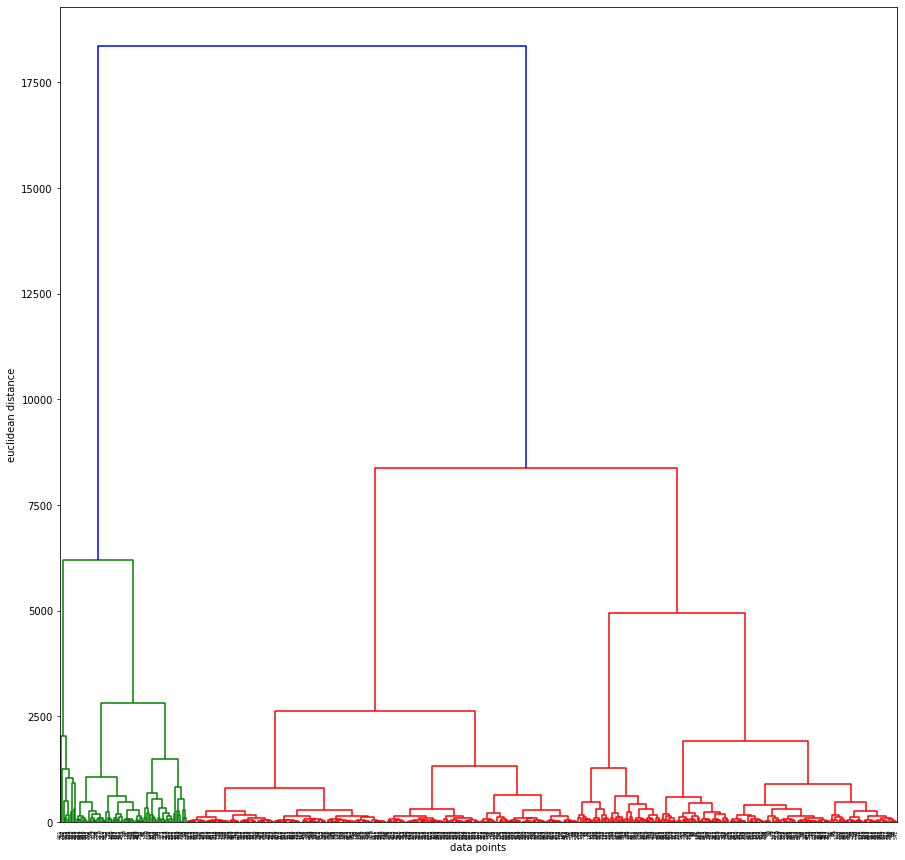

In [324]:
plt.figure(figsize = (15, 15))
merg = linkage(dataWithoutLabels, method = "ward")
dendrogram(merg, leaf_rotation = 90)

plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

Make predictions based on the number of clusters

In [0]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")
cluster = hc.fit_predict(dataWithoutLabels)

label = 0  --> Benign<br>
label = 1 --> Malignant

Merge the predictions with the data

In [326]:
#t1 = data["diagnosis"]
#t2 = dataWithoutLabels["label"]
dataWithoutLabels["label"] = cluster
dd=pd.merge(dataWithoutLabels,data)
dd["label"].value_counts()

0    483
1     86
Name: label, dtype: int64

Look at the incorrect predictions

In [327]:
#The incorrect predictions
cs1 = dd["label"] == 0
cs2 = dd["diagnosis"] == "M"

wrongs = dd.loc[(cs1) & (cs2)]
wrongs['index1'] = wrongs.index
wrongs

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,label,diagnosis,index1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,M,3
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.011370,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0,M,5
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.014480,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0,M,7
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.012260,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0,M,8
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.014320,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0,M,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,15.05,19.07,97.26,701.9,0.09215,0.08597,0.07486,0.04335,0.1561,0.05915,0.3860,1.1980,2.630,38.49,0.004952,0.01630,0.02967,0.009423,0.01152,0.001718,17.58,28.06,113.80,967.0,0.1246,0.2101,0.2866,0.1120,0.2282,0.06954,0,M,514
516,18.31,20.58,120.80,1052.0,0.10680,0.12480,0.15690,0.09451,0.1860,0.05941,0.5449,0.9225,3.218,67.36,0.006176,0.01877,0.02913,0.010460,0.01559,0.002725,21.86,26.20,142.20,1493.0,0.1492,0.2536,0.3759,0.1510,0.3074,0.07863,0,M,516
536,14.27,22.55,93.77,629.8,0.10380,0.11540,0.14630,0.06139,0.1926,0.05982,0.2027,1.8510,1.895,18.54,0.006113,0.02583,0.04645,0.012760,0.01451,0.003756,15.29,34.27,104.30,728.3,0.1380,0.2733,0.4234,0.1362,0.2698,0.08351,0,M,536
562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,0.2602,1.2050,2.362,22.65,0.004625,0.04844,0.07359,0.016080,0.02137,0.006142,17.52,42.79,128.70,915.0,0.1417,0.7917,1.1700,0.2356,0.4089,0.14090,0,M,562


In [328]:
cs1 = dd["label"] == 1
cs2 = dd["diagnosis"] == "B"
wrongsB = dd.loc[(cs1) & (cs2)]
wrongsB

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,label,diagnosis


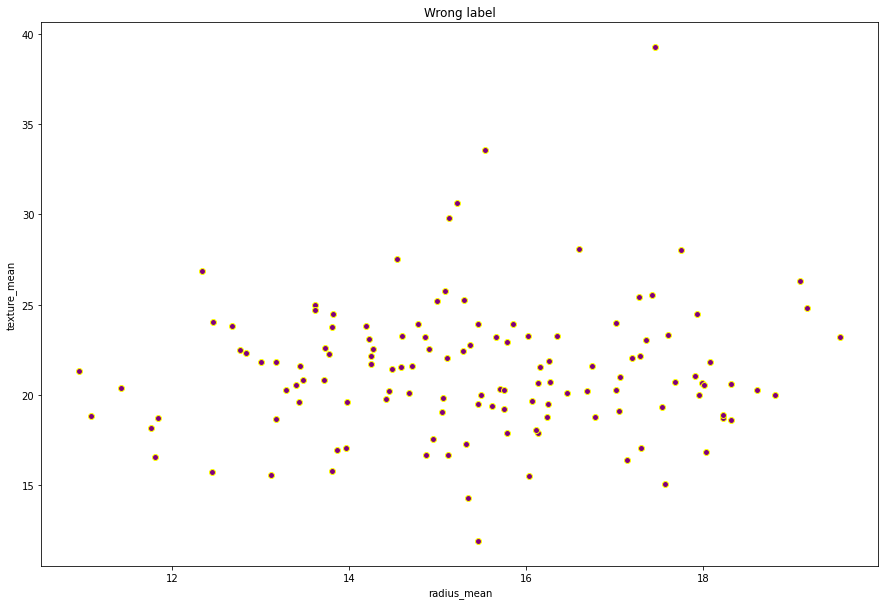

In [331]:
plt.figure(figsize = (15, 10))
plt.scatter(wrongs[xaxis],wrongs[yaxis], color='purple',edgecolors='yellow')
plt.title("Wrong label")
plt.xlabel(xaxis)
plt.ylabel(yaxis)

plt.show()

In [332]:
dataWithoutLabels.label.value_counts()

0    483
1     86
Name: label, dtype: int64

Plot the data points, colored by category. <br>
Make incorrect predictions are purple with yellow edges

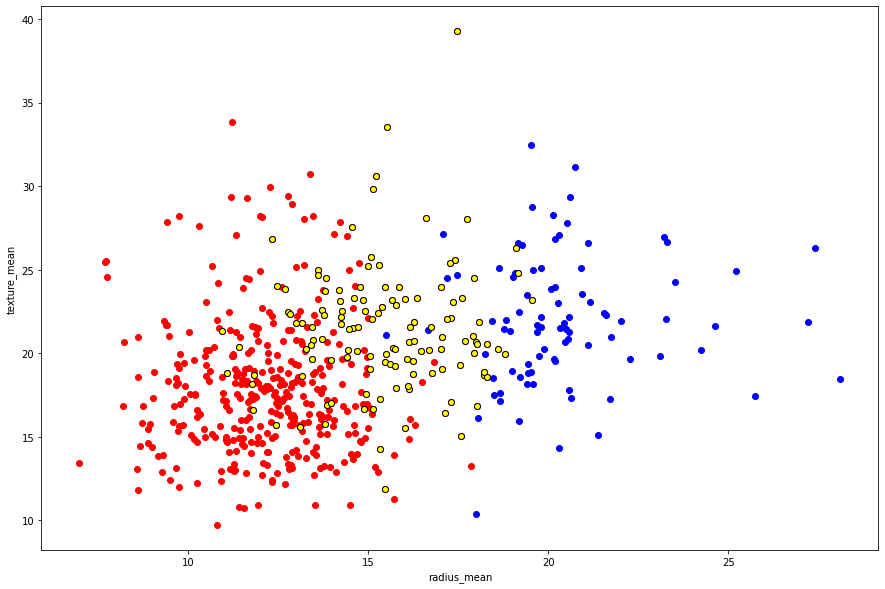

In [335]:
# Data after hierarchical clustering

plt.figure(figsize = (15, 10))

plt.scatter(dataWithoutLabels[xaxis][dataWithoutLabels.label == 0], dataWithoutLabels[yaxis][dataWithoutLabels.label == 0], color = "red")
plt.scatter(dataWithoutLabels[xaxis][dataWithoutLabels.label == 1], dataWithoutLabels[yaxis][dataWithoutLabels.label == 1], color = "blue")
plt.scatter(dataWithoutLabels[xaxis][dataWithoutLabels.label == 2], dataWithoutLabels[yaxis][dataWithoutLabels.label == 2], color = "green")
plt.scatter(dataWithoutLabels[xaxis][dataWithoutLabels.label == 3], dataWithoutLabels[yaxis][dataWithoutLabels.label == 3], color = "orange")
plt.scatter(wrongs[xaxis],wrongs[yaxis], color='yellow',edgecolors='black')
plt.xlabel(xaxis)
plt.ylabel(yaxis)

plt.show()